# Анализ данных и создание модели машинного обучения

## Работа с данными

### Загрузка датасета

In [1]:
import pandas as pd

df = pd.read_csv('data/data.csv')


### Вывод первых нескольких строк датасета

In [2]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Вывод информации о данных и описательных статистик

In [3]:
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   str    
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   str    
 6   work_type          5110 non-null   str    
 7   Residence_type     5110 non-null   str    
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   str    
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), str(5)
memory usage: 479.2 KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Обработка

In [4]:
df_clean = df.drop(columns=['id'], errors='ignore')
df_clean['bmi'] = df_clean['bmi'].fillna(df_clean['bmi'].median())
df_final = pd.get_dummies(df_clean, drop_first=True)
df_final = df_final.drop(columns=['work_type_children'], errors='ignore')
df_final = df_final[df_final['bmi'] <= 60]
df_final = df_final[df_final['age'] >= 18]

df_final.info()
df_final.describe()


<class 'pandas.DataFrame'>
Index: 4242 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4242 non-null   float64
 1   hypertension                    4242 non-null   int64  
 2   heart_disease                   4242 non-null   int64  
 3   avg_glucose_level               4242 non-null   float64
 4   bmi                             4242 non-null   float64
 5   stroke                          4242 non-null   int64  
 6   gender_Male                     4242 non-null   bool   
 7   gender_Other                    4242 non-null   bool   
 8   ever_married_Yes                4242 non-null   bool   
 9   work_type_Never_worked          4242 non-null   bool   
 10  work_type_Private               4242 non-null   bool   
 11  work_type_Self-employed         4242 non-null   bool   
 12  Residence_type_Urban            4242 non-null   bo

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000
mean,50.218765,0.116219,0.064828,108.525281,30.229302,0.058227
std,17.838629,0.320525,0.246251,47.777123,6.811999,0.234200
min,18.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,36.000000,0.000000,0.000000,77.492500,25.600000,0.000000
50%,50.000000,0.000000,0.000000,92.465000,28.800000,0.000000
75%,64.000000,0.000000,0.000000,116.115000,33.775000,0.000000
max,82.000000,1.000000,1.000000,271.740000,59.700000,1.000000


Убраны столбцы id, work_type_children и строки с аномально высоким ИМТ и возрастом ниже 18, так как модель нацелена на оценку риска инсульта у взрослого населения. Пропущенные значения ИМТ заменены на медианные. Текстовые данные заменены на бинарные.

## Анализ данных

### Построение тепловой карты корреляций

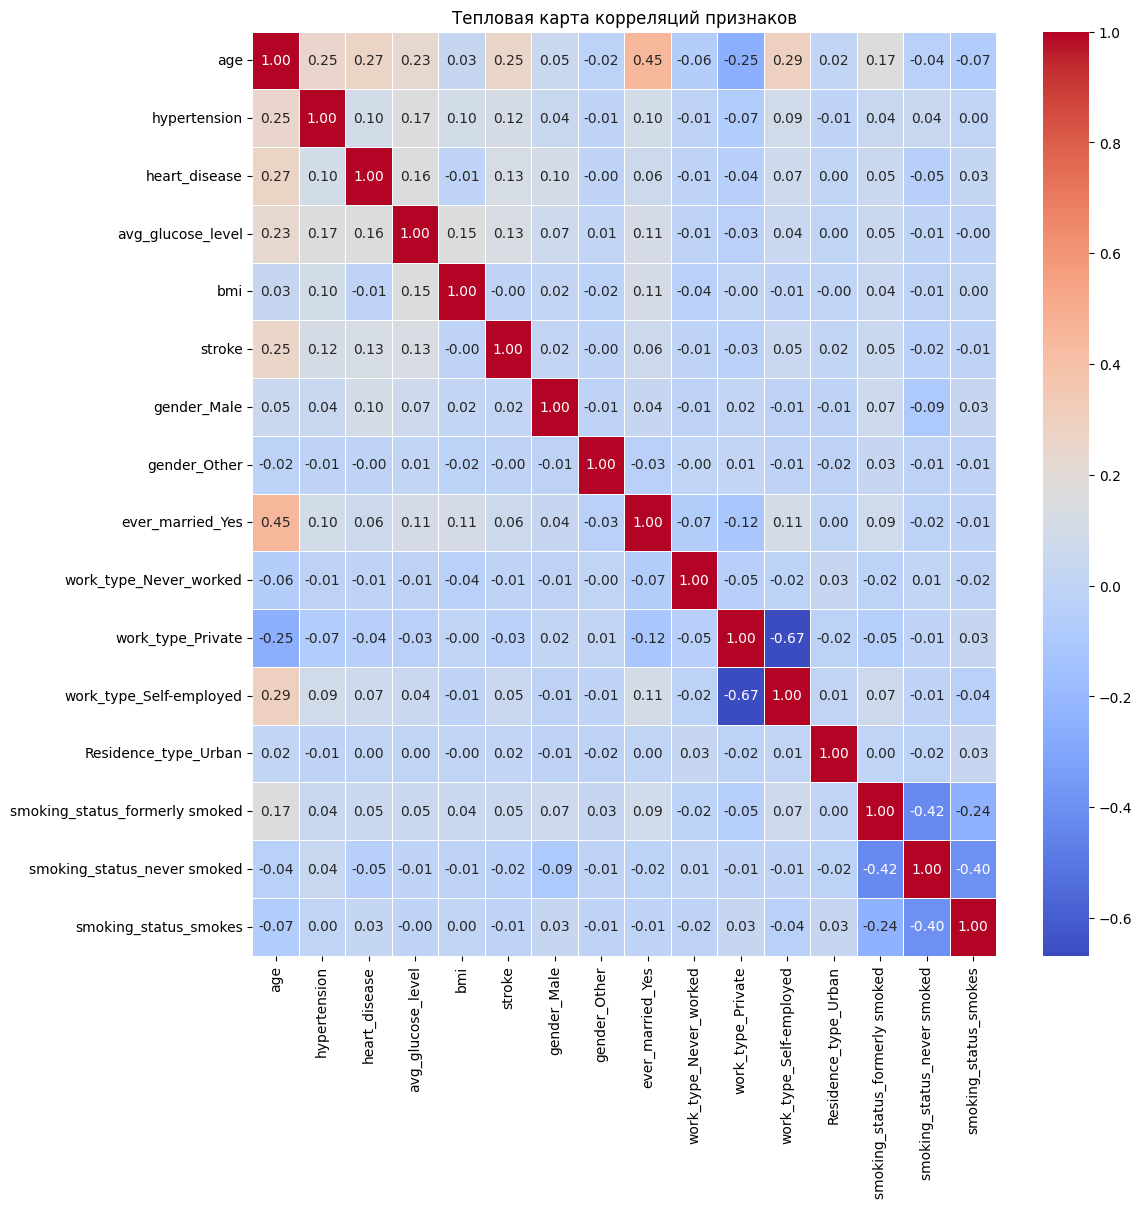

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_final.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта корреляций признаков')
plt.show()


Наибольшая корреляция с целевым признаком (stroke) у возраста. К следующим по значимости признакам относятся уровень глюкозы, наличие сердечно-сосудистых заболеваний и гипертензии. 

### Построение boxplot

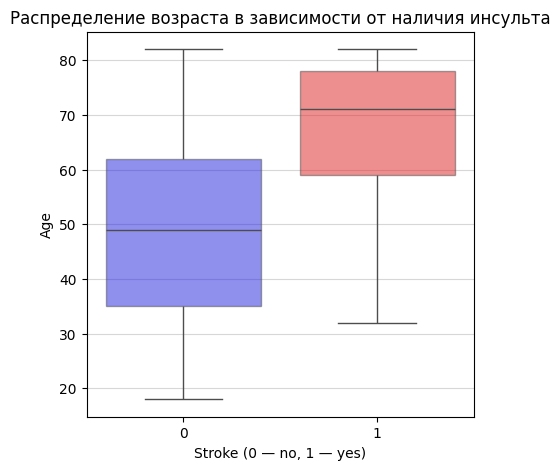

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
colours = {0: 'blue', 1: 'red'}
sns.boxplot(x='stroke', y='age', data=df_final, palette=colours, hue='stroke', legend=False, boxprops={'alpha': 0.5}) 
plt.title('Распределение возраста в зависимости от наличия инсульта')
plt.xlabel('Stroke (0 — no, 1 — yes)')
plt.ylabel('Age')
plt.grid(axis='y', alpha=0.5)
plt.show()


## Обучение моделей

### Подготовка данных для обучения моделей

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_final.drop('stroke', axis=1)
y = df_final['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Доля инсультов в обучающей выборке: {:.2f}%".format(y_train.mean() * 100))
print("Доля инсультов в тестовой выборке: {:.2f}%".format(y_test.mean() * 100))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Доля инсультов в обучающей выборке: 5.49%
Доля инсультов в тестовой выборке: 6.60%


### Построение и оценка моделей

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced_subsample', max_depth=8, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_probs = model.predict_proba(X_test_scaled)[:, 1]

    results.append({
        "Model": name,
        "ROC-AUC": roc_auc_score(y_test, y_probs),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
    })

final_results = pd.DataFrame(results).set_index("Model")
print(final_results.sort_values(by="ROC-AUC", ascending=False))


                      ROC-AUC  Precision    Recall
Model                                             
Logistic Regression  0.826285   0.170426  0.809524
Gradient Boosting    0.808317   0.666667  0.023810
Random Forest        0.803146   0.233766  0.214286


Наилучший результат показала модель логической регрессии.

## Работа с моделью

### Код для обучения и переобучения модели

In [9]:
def train_or_retrain_model(df):
    
    X_data = df.drop('stroke', axis=1)
    y_data = df['stroke']
    
    scaler = StandardScaler() 
    X_scaled = scaler.fit_transform(X_data) 
    
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_scaled, y_data)
    
    return model, scaler, list(X_data.columns)


### Код для сохранения и загрузки модели

In [10]:
import joblib

def save_model(m, s, c):
    joblib.dump(m, 'model.pkl')
    joblib.dump(s, 'scaler.pkl')
    joblib.dump(c, 'columns.pkl')

def load_model():
    m = joblib.load('model.pkl')
    s = joblib.load('scaler.pkl')
    c = joblib.load('columns.pkl')
    return m, s, c

model, scaler, columns = train_or_retrain_model(df_final)
save_model(model, scaler, columns)


### Код для прогнозирования риска инсульта

In [11]:
import pandas as pd

def predict_stroke_risk(patient_dict):
    m, s, c = load_model()
    df_p = pd.DataFrame(0, index=[0], columns=c)
    
    for key, value in patient_dict.items():
        if key in df_p.columns:
            df_p.loc[0, key] = value
    
    scaled_data = s.transform(df_p)
    probability = m.predict_proba(scaled_data)[0][1] 
    
    if probability < 0.1:     cat = "Крайне низкий"
    elif probability < 0.25:  cat = "Низкий"
    elif probability < 0.5:   cat = "Значительный"
    elif probability < 0.75:  cat = "Высокий"
    else:              cat = "Крайне высокий"
    
    return {"Вероятность инсульта": f"{probability:.1%}", "Риск инсульта": cat}

test_patient = {
    'age': 68, 
    'avg_glucose_level': 180, 
    'hypertension': 1, 
    'heart_disease': 0, 
    'bmi': 32,
    'gender_Male': 1
}

a = predict_stroke_risk(test_patient)
print(f"Вероятность инсульта: {a['Вероятность инсульта']}")
print(f"Риск инсульта: {a['Риск инсульта']}")


Вероятность инсульта: 76.8%
Риск инсульта: Крайне высокий
